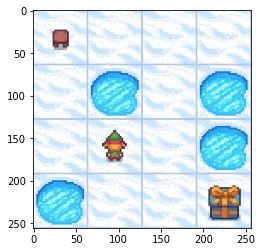

In [1]:
import numpy as np
import random
import gym
import time

from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make("FrozenLake-v1")
# episodes = 2

# for episode in range(1, episodes):
#     state = env.reset()
#     done = False
#     score = 0

#     while not done:
#         env.render()
#         state, reward, done, info = env.step(env.action_space.sample())
#         score += reward

#     print("Episode: {}\nScore: {}".format(episode, score))

# env.close()

# Q-table 생성
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

print(q_table.shape)

# Q-learning 파라미터
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

# Q-learning 알고리즘
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # exploration vs explitation trade-off
        exploration_threshold = random.uniform(0, 1)
        if exploration_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        # update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state

        rewards_current_episode += reward

        if done == True:
            break

    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards_all_episodes.append(rewards_current_episode)

print("***** 학습 완료 *****")

# print(q_table)

# 1000개 episode당 평균 reward 계산 및 출력
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000

print("1000개 episode당 평균")
for r in rewards_per_thousand_episodes:
    print(count, " : ", str(sum(r/1000)))
    count += 1000

# Visualize Agent

for episode in range(3):
    state = env.reset()
    done = False
    print("Episode is : " + str(episode))
    time.sleep(1)

    for step in range(max_steps_per_episode):
        img = plt.imshow(env.render(mode="rgb_array"))
        img.set_data(env.render(mode="rgb_array"))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.4)
        action = np.argmax(q_table[state, :])

        new_state, reward, done, info = env.step(action)

        if done:
            img = plt.imshow(env.render(mode="rgb_array"))
            img.set_data(env.render(mode="rgb_array"))
            display.display(plt.gcf())
            display.clear_output(wait=False)

            if reward == 1:
                print("***** 목적지 도착 *****")
                time.sleep(2)
            else:
                print("***** 실패 *****")
                time.sleep(2)

            break

        state = new_state

env.close()